# BONUS


1. Generate a visulization of the data
2. Import SQL database into Pandas
3. Create a histogram to visualize the most common salary ranges for employees
4. Create a bar chart of average salary by title

In [ ]:
# Install psycopg2 sqlalchemy

!pip install psycopg2 sqlalchemy

*** Before using Jupyter, change table names to get rid of " " for "Salaries" and "Titles" tables to query later ***

The following code is used in pgAdmin prior to gathering data:

- ALTER TABLE "Salaries" RENAME TO Salaries;
- ALTER TABLE "Titles" RENAME TO Titles;

In [75]:
# Import Dependencies

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
from sqlalchemy import create_engine


In [76]:
# Create engine to make connection with database in Postgres
# Get rid of password since pushing to git hub

engine = create_engine('postgres://****************@localhost:5432/Employees_DB')
connection = engine.connect()


In [77]:
# Query all records in the Salaries table to get salary data frame

salary_df = pd.read_sql("SELECT * FROM Salaries", connection)

# Display head of data frame

salary_df.head()


,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12


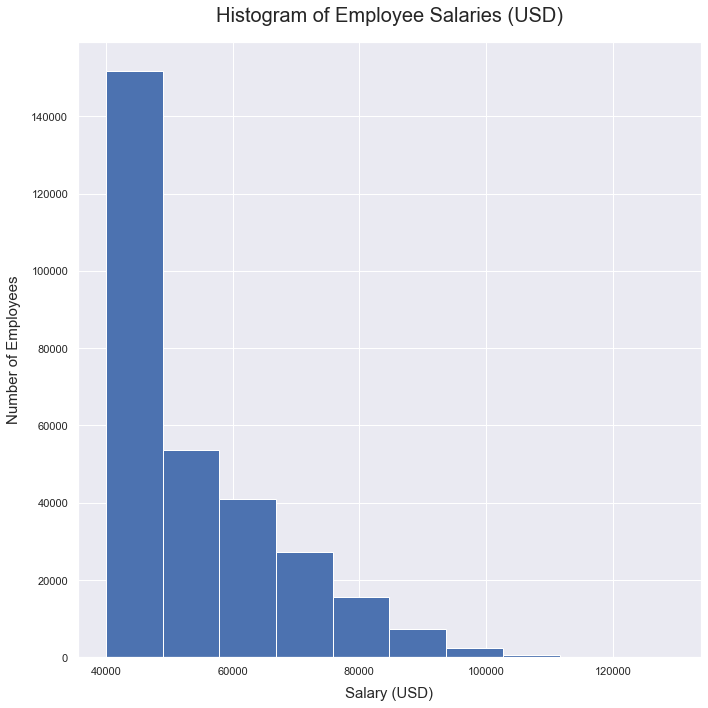

In [78]:
# Plot a histogram of salary data

# Set to Seaborn style

sns.set()

# Set x values to the salary values

x = salary_df["salary"].tolist()

# Set the number of bins, I chose 10

bins = 10

# Set the figure size of the graph

fig = plt.figure(figsize=(10,10))

# Plot the histogram

graph_1 = plt.hist(x, bins=bins)

# Set the x-label, y-label, and title

plt.xlabel("Salary (USD)", fontsize=15, labelpad=10)
plt.ylabel("Number of Employees", fontsize=15, labelpad=10)
plt.title("Histogram of Employee Salaries (USD)", fontsize=20, pad=20)

# Apply tight layout

plt.tight_layout()

# Save the graph

fig.savefig("Histogram_of_Employee_Salaries.png")

# Show the graph

plt.show()

# Close the graph

plt.close()


In [79]:
# Use Join to query the salary and title data from the Salaries and Titles tables

titles_salary_df = pd.read_sql("SELECT s.salary, t.title FROM Salaries AS s INNER JOIN titles AS t ON s.emp_no=t.emp_no", connection)

# Display head of data frame

titles_salary_df.head()


,salary,title
0,60117,Senior Engineer
1,78228,Senior Staff
2,78228,Staff
3,72488,Engineer
4,42365,Staff


In [80]:
# Use groupby() and mean() to get average salary by title

avg_salary_by_title = pd.DataFrame(titles_salary_df.groupby(["title"]).mean()["salary"])

# Reset the index

avg_salary_by_title = avg_salary_by_title.reset_index()

# Display data

avg_salary_by_title


,title,salary
0,Assistant Engineer,48493.204786
1,Engineer,48539.781423
2,Manager,51531.041667
3,Senior Engineer,48506.751806
4,Senior Staff,58503.286614
5,Staff,58465.271904
6,Technique Leader,48580.505772


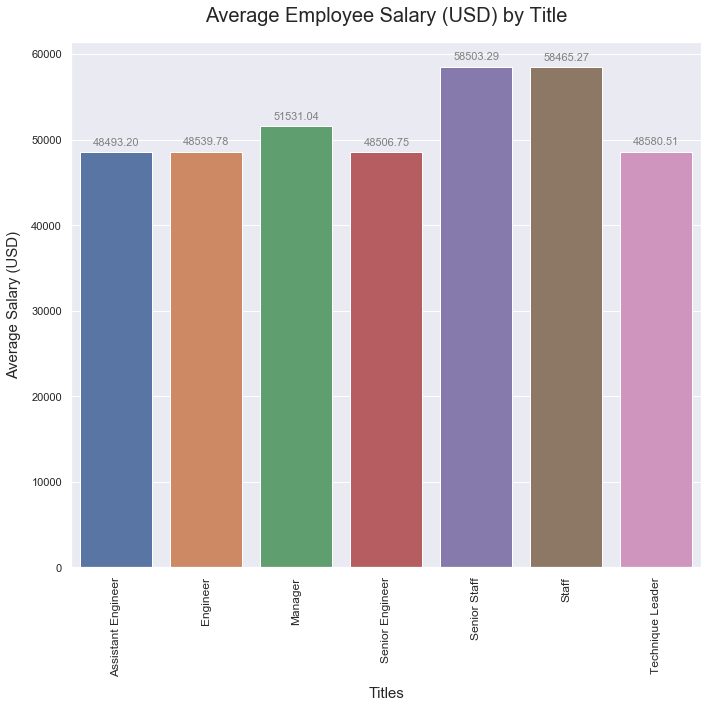

In [81]:
# Plot a bar graph displaying the data of the above table

# Set x values to "title" data
# Set y values to "salary" data

x_values = avg_salary_by_title["title"].tolist()
y_values = avg_salary_by_title["salary"].tolist()

# Get ticks

x_ticks = np.arange(len(x_values))

# Set figure size

fig_2 = plt.figure(figsize=(10,10))

# Plot bar graph using Seaborn style

graph_2 = sns.barplot(x_values, y_values, palette="deep")

# Plot the tick names vertically for better visualization

plt.xticks(x_ticks, x_values, rotation="vertical", fontsize=12)

# Set the x-label, y-label, and title

plt.xlabel("Titles", fontsize=15, labelpad=10)
plt.ylabel("Average Salary (USD)", fontsize=15, labelpad=10)
plt.title("Average Employee Salary (USD) by Title", fontsize=20, pad=20)

# Display the average amounts above each bar

for i in graph_2.patches:
    graph_2.annotate("%.2f" % i.get_height(), (i.get_x() + i.get_width() / 2., i.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 10),
                 textcoords='offset points')

# Apply tight layout

plt.tight_layout()
    
# Save the graph

fig_2.savefig("Average_Employee_Salary_by_Title.png")  

# Show the graph

plt.show()

# Close the graph

plt.close()
